In [5]:
import os,sys,glob
from seisgo.noise import compute_fft,correlate
from seisgo import utils,downloaders

In [6]:
rootdir='.'
respdir='.'
sacfiles = sorted(glob.glob(os.path.join(rootdir,'*.SAC')))
rm_resp='RESP'
#for removing responses.
freqmin=0.01
freqmax=100

tr,inv=downloaders.read_data(sacfiles,rm_resp=rm_resp,freqmin=freqmin,freqmax=freqmax,stainv=True)
tr1,tr2=tr;inv1,inv2=inv

#trimming is needed for this data set, which there is one sample difference in the starting time.
cstart=max([tr1.stats.starttime,tr2.stats.starttime])
cend=min([tr1.stats.endtime,tr2.stats.endtime])
tr1.trim(starttime=cstart,endtime=cend,nearest_sample=True)
tr2.trim(starttime=cstart,endtime=cend,nearest_sample=True)

remove response using RESP files
['./RESP.DT.24.DPZ']
remove response using RESP files
['./RESP.DT.3.DPZ']


DT.3..DPZ | 2020-03-27T00:00:00.004000Z - 2020-03-27T23:59:59.997273Z | 250.0 Hz, 21599998 samples

In [7]:
print('cross-correlation ...')
cc_len    = 3600                                                            # basic unit of data length for fft (sec)
cc_step      = 900                                                             # overlapping between each cc_len (sec)
maxlag         = 100                                                        # lags of cross-correlation to save (sec)
freq_norm='rma'
time_norm='rma'

#for whitening
freqmin=0.02
freqmax=2
#get FFT, #do correlation
fftdata1=compute_fft(tr1,cc_len,cc_step,stainv=inv1,
                        freq_norm=freq_norm,freqmin=freqmin,freqmax=freqmax,
                     time_norm=time_norm,smooth=500)
fftdata2=compute_fft(tr2,cc_len,cc_step,stainv=inv2,
                       freq_norm=freq_norm,freqmin=freqmin,freqmax=freqmax,
                     time_norm=time_norm,smooth=500)
corrdata=correlate(fftdata1,fftdata2,maxlag,substack=True)

cross-correlation ...
slicing trace into [91] segments.
Initializing FFTData with whitening ...
slicing trace into [91] segments.
Initializing FFTData with whitening ...


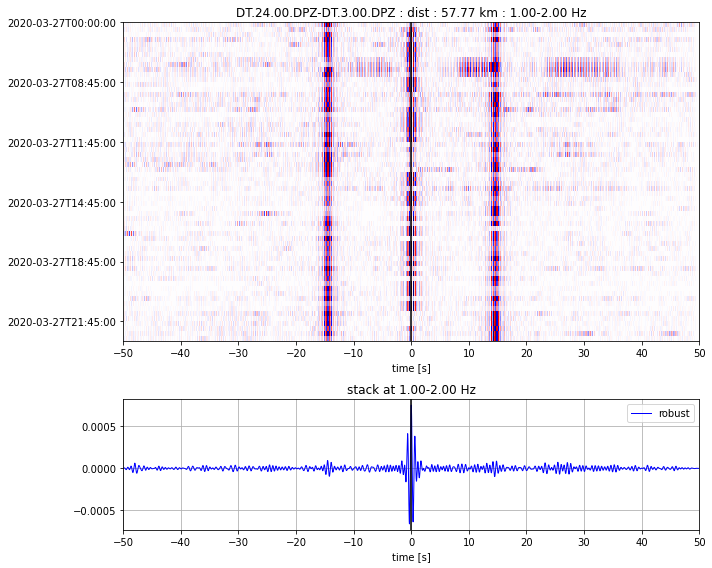

In [8]:
#plot xcorr result
corrdata.plot(freqmin=1,freqmax=2,lag=50,stack_method='robust',save=False)